# Import libraries


In [1]:
#Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
#       'yearsExperience', 'milesFromMetropolis', 'salary'],
#      dtype='object')
#python -m pip install seaborn
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
import numpy as np
from IPython.core.pylabtools import figsize
plt.style.use('seaborn')
#rcParams.update({'figure.autolayout': True})
#sns.set(font_scale = 2)
#pd.set_option('display.max_columns', 10)
#pd.set_option('display.width', 350)




C:\Users\btr\AppData\Local\Temp\ipykernel_17068\1127652880.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# load data and join

In [3]:
#Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
#       'yearsExperience', 'milesFromMetropolis'],
#      dtype='object')
#Index(['jobId', 'salary'], dtype='object')
#print("hello wolrd")
import pandas as pd
train_features_file = "train_features.csv"
train_salaries_file = "train_salaries.csv"
train_feat = pd.read_csv(train_features_file,sep=',',lineterminator='\n')
train_sal = pd.read_csv(train_salaries_file,sep=',',lineterminator='\n')
train_feat_sal = pd.merge(train_feat, train_sal, on='jobId', how='outer')#outer,left,right
train_feat_sal.head()
#print(train_feat_sal.columns)
#print(train_feat.shape)
#print(train_sal.shape)
#print(train_feat.columns)
#print(train_sal.columns)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


# Explore Data

In [5]:
train_feat_sal.describe(include = 'all')

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362684407687,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


In [6]:
train_feat_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [5]:
train_feat_sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [7]:
#check 0 salary rows
train_feat_sal[train_feat_sal["salary"]==0].head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [7]:
#salary for above rows should not be 0 and there are only 5 such rows..it's better to drop them
train_feat_sal = train_feat_sal[train_feat_sal["salary"]!=0]


In [8]:
#explore values in each column
cols = train_feat_sal.columns
for col in cols:
    dist_vals = sorted(train_feat_sal[col].unique())    
    print(col + "\t"+ str(len(dist_vals))+"\t"+str(dist_vals[:10]))

jobId	999995	['JOB1362684407687', 'JOB1362684407688', 'JOB1362684407689', 'JOB1362684407690', 'JOB1362684407691', 'JOB1362684407692', 'JOB1362684407693', 'JOB1362684407694', 'JOB1362684407695', 'JOB1362684407696']
companyId	63	['COMP0', 'COMP1', 'COMP10', 'COMP11', 'COMP12', 'COMP13', 'COMP14', 'COMP15', 'COMP16', 'COMP17']
jobType	8	['CEO', 'CFO', 'CTO', 'JANITOR', 'JUNIOR', 'MANAGER', 'SENIOR', 'VICE_PRESIDENT']
degree	5	['BACHELORS', 'DOCTORAL', 'HIGH_SCHOOL', 'MASTERS', 'NONE']
major	9	['BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'COMPSCI', 'ENGINEERING', 'LITERATURE', 'MATH', 'NONE', 'PHYSICS']
industry	7	['AUTO', 'EDUCATION', 'FINANCE', 'HEALTH', 'OIL', 'SERVICE', 'WEB']
yearsExperience	25	[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
milesFromMetropolis	100	[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
salary	279	[17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


C:\Users\btr\AppData\Local\Temp\ipykernel_13092\1078525265.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_feat_sal.salary, bins = 20)


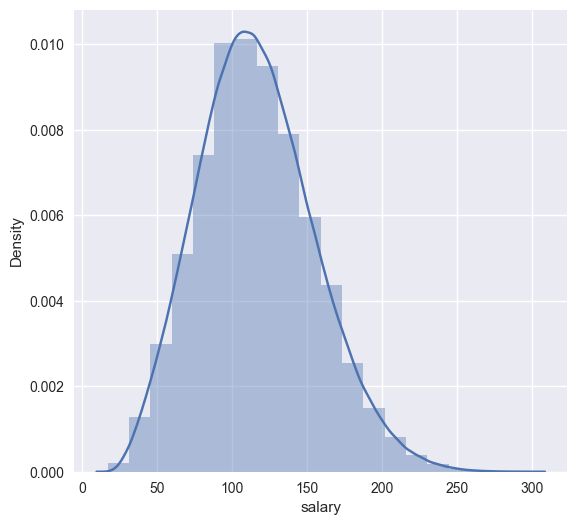

In [9]:
plt.figure(figsize = (14,6))
plt.subplot(1, 2, 2)
sns.distplot(train_feat_sal.salary, bins = 20)
plt.show()

In [10]:
def plot_feature(df, target, col): 
    categories = df[col].value_counts().index.to_list()
    n_categories = len(categories)
    if n_categories < 20 or df[col].dtype != 'int64':
        print(df[col].value_counts())
    
    plt.figure(figsize = (16,12))
    if df[col].dtype == 'int64':
        plt.subplot(2,1,1)
        if n_categories < 30:
            sns.distplot(df[col], bins = n_categories)
        else:
            sns.distplot(df[col], bins = 25)           
        plt.subplot(2,1,2)
        sns.lineplot(x = col, y = target, data = df)
    else:
        if n_categories < 20:
            plt.subplot(2,1,1)
            sns.countplot(x = col, data = df) 
            plt.subplot(2,1,2)
            sns.boxplot(x = col, y = target, data = df)
    plt.show()

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64


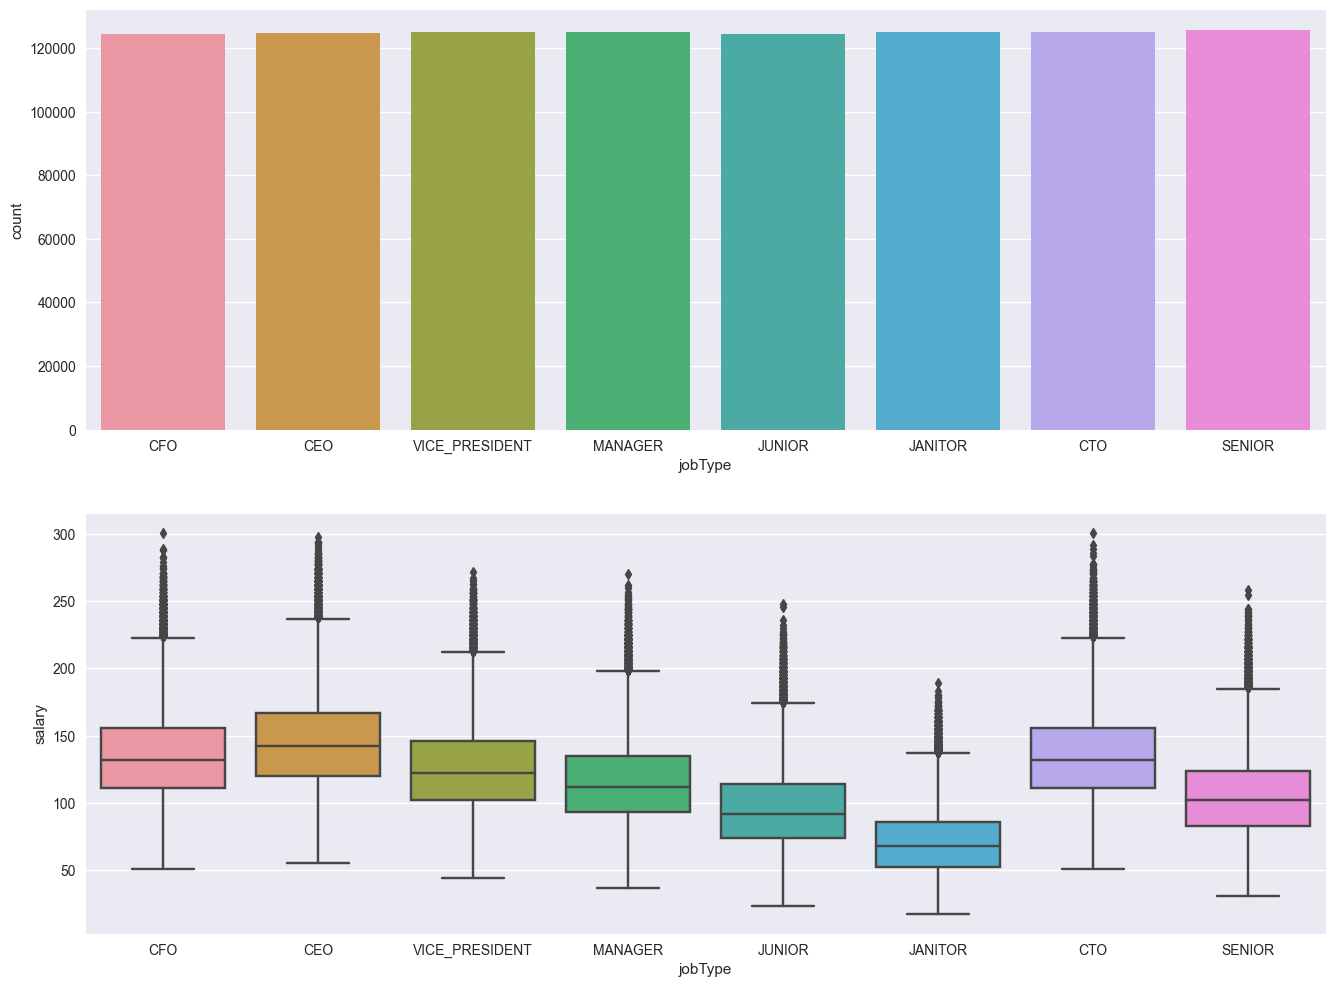

In [11]:
plot_feature(train_feat_sal, 'salary','jobType')

NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64


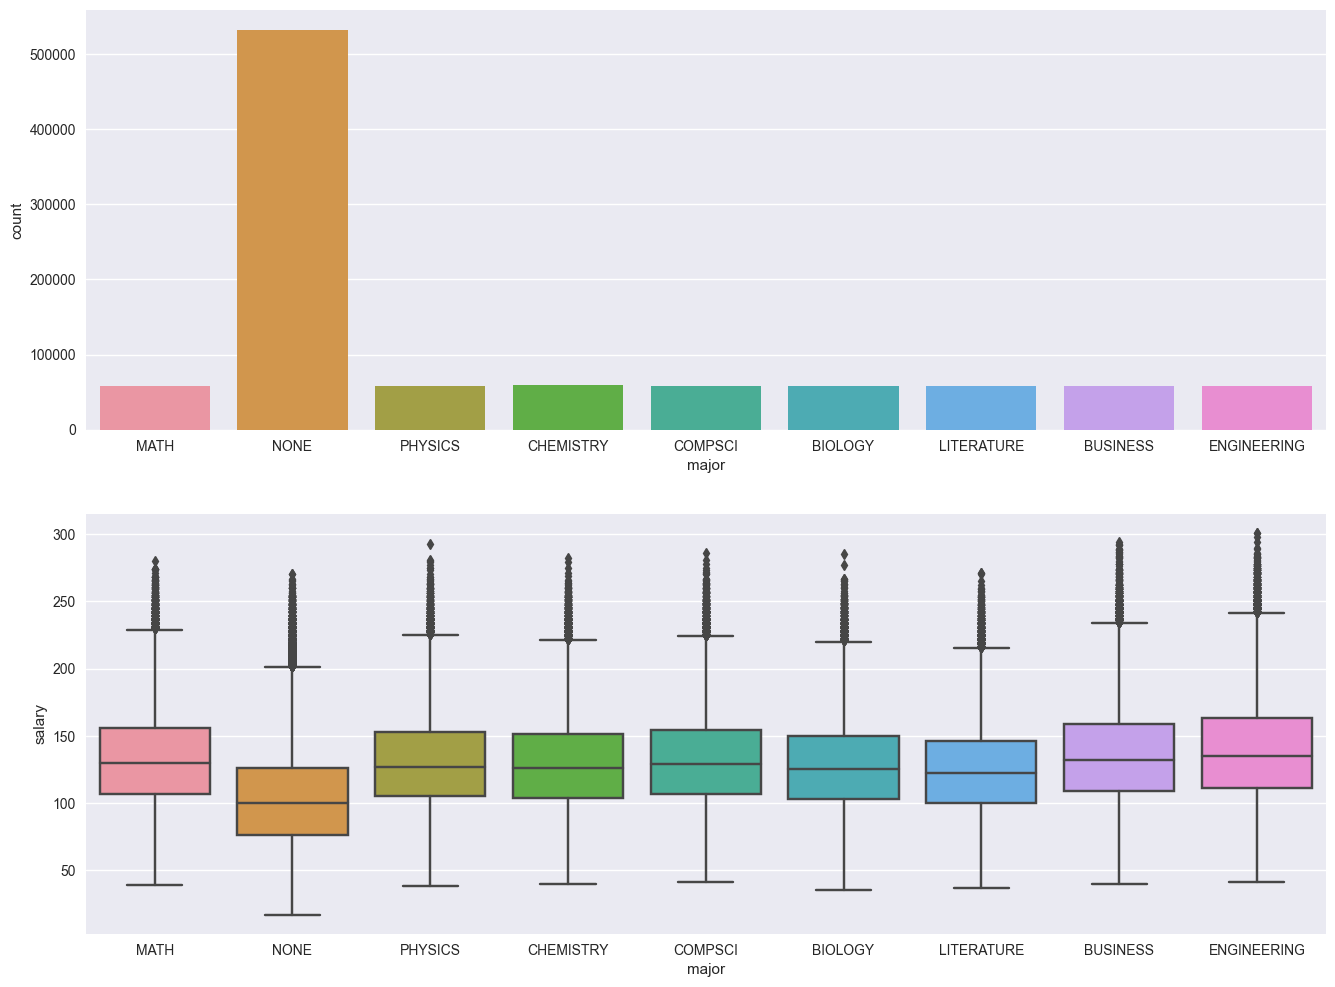

In [12]:
plot_feature(train_feat_sal, 'salary','major')

WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64


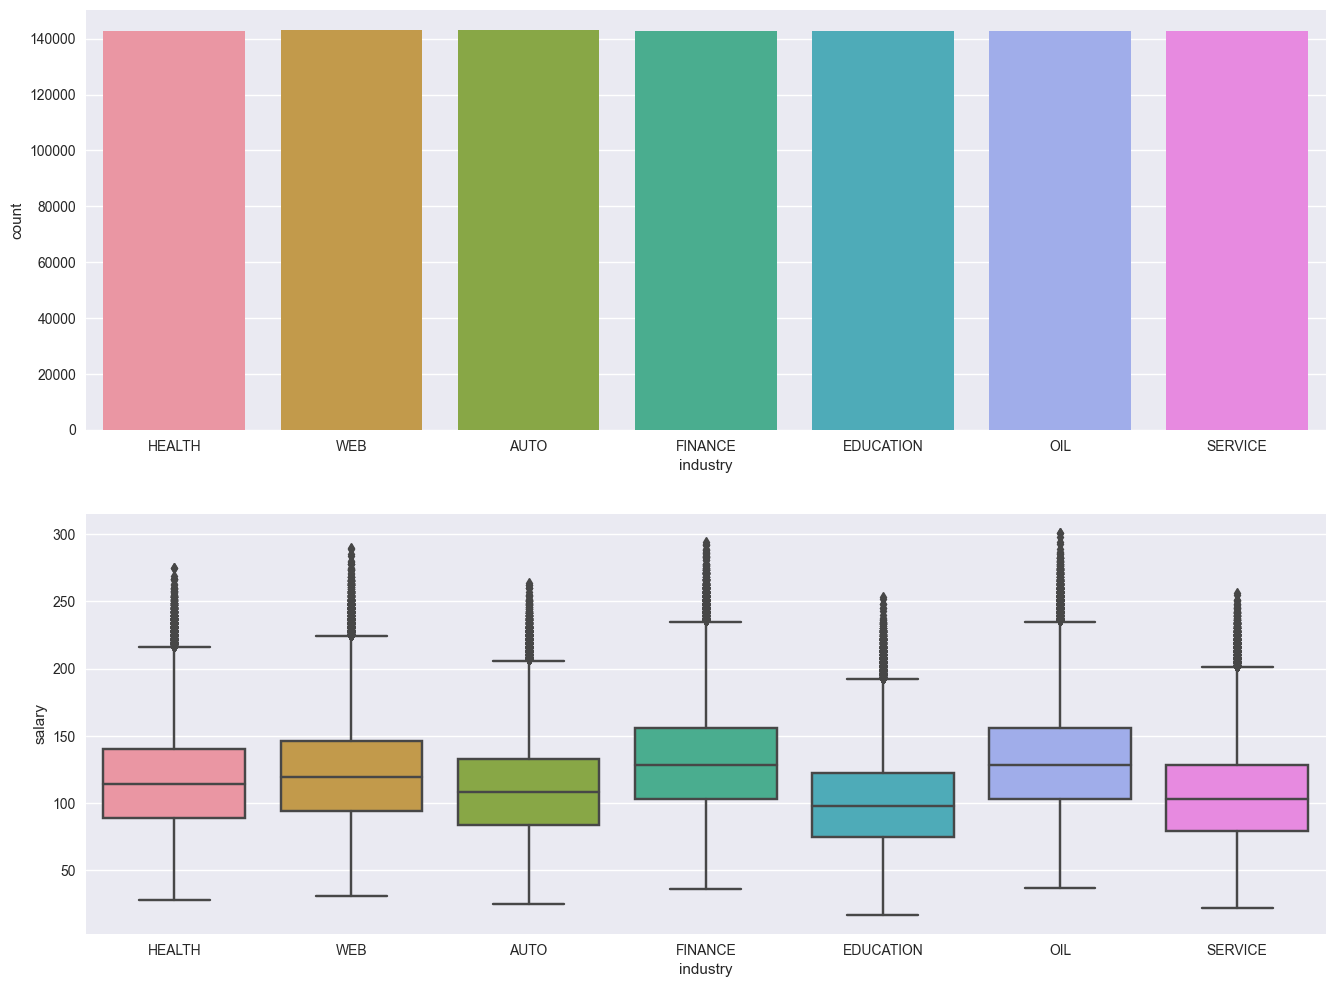

In [13]:
plot_feature(train_feat_sal, 'salary','industry')

HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64


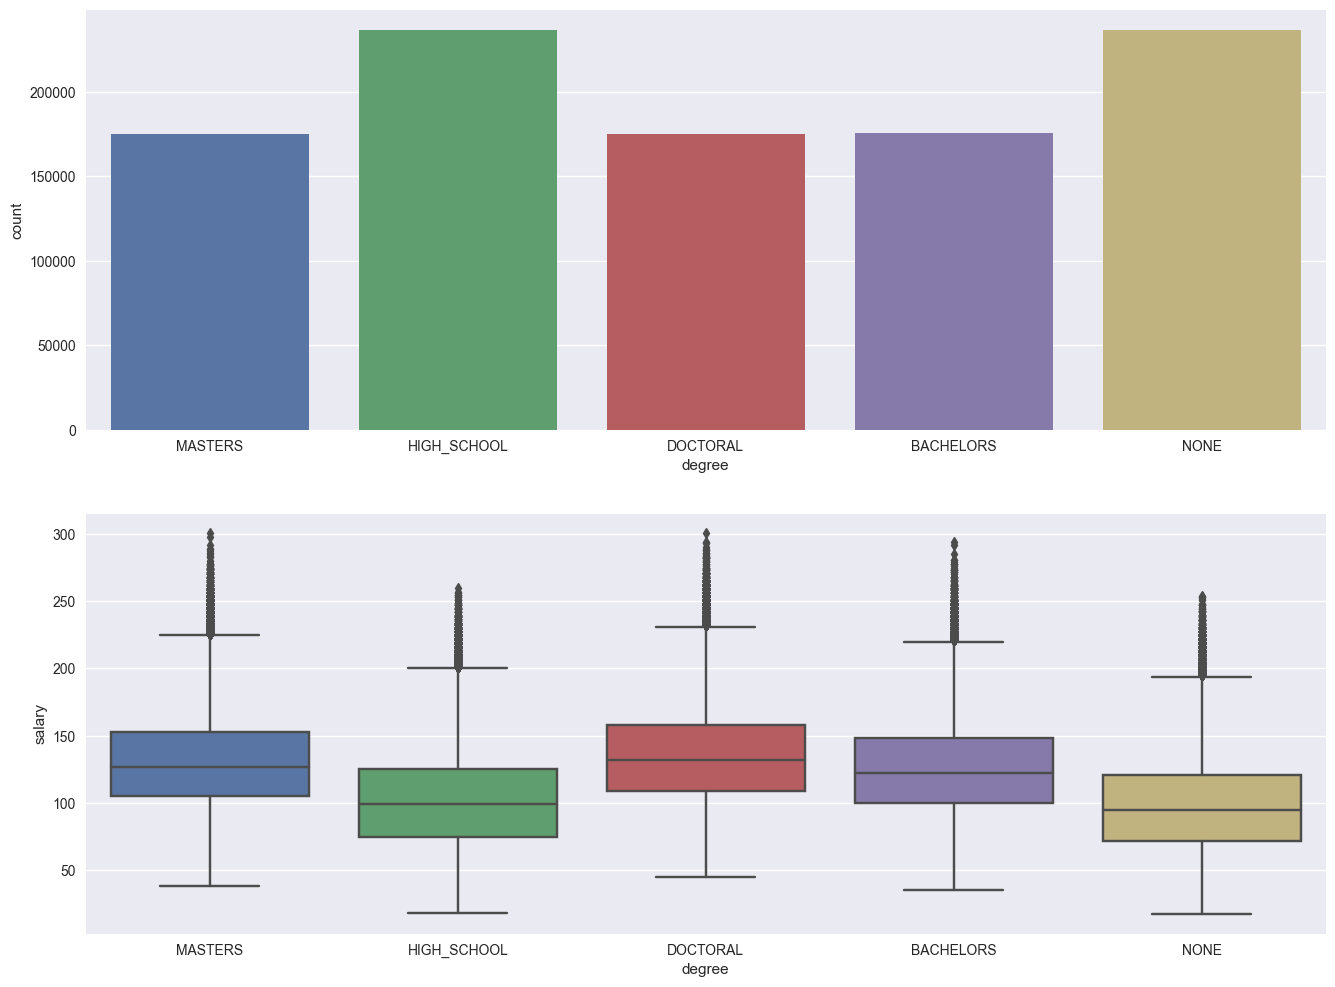

In [14]:
plot_feature(train_feat_sal, 'salary','degree')

C:\Users\btr\AppData\Local\Temp\ipykernel_13092\1389972553.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins = n_categories)


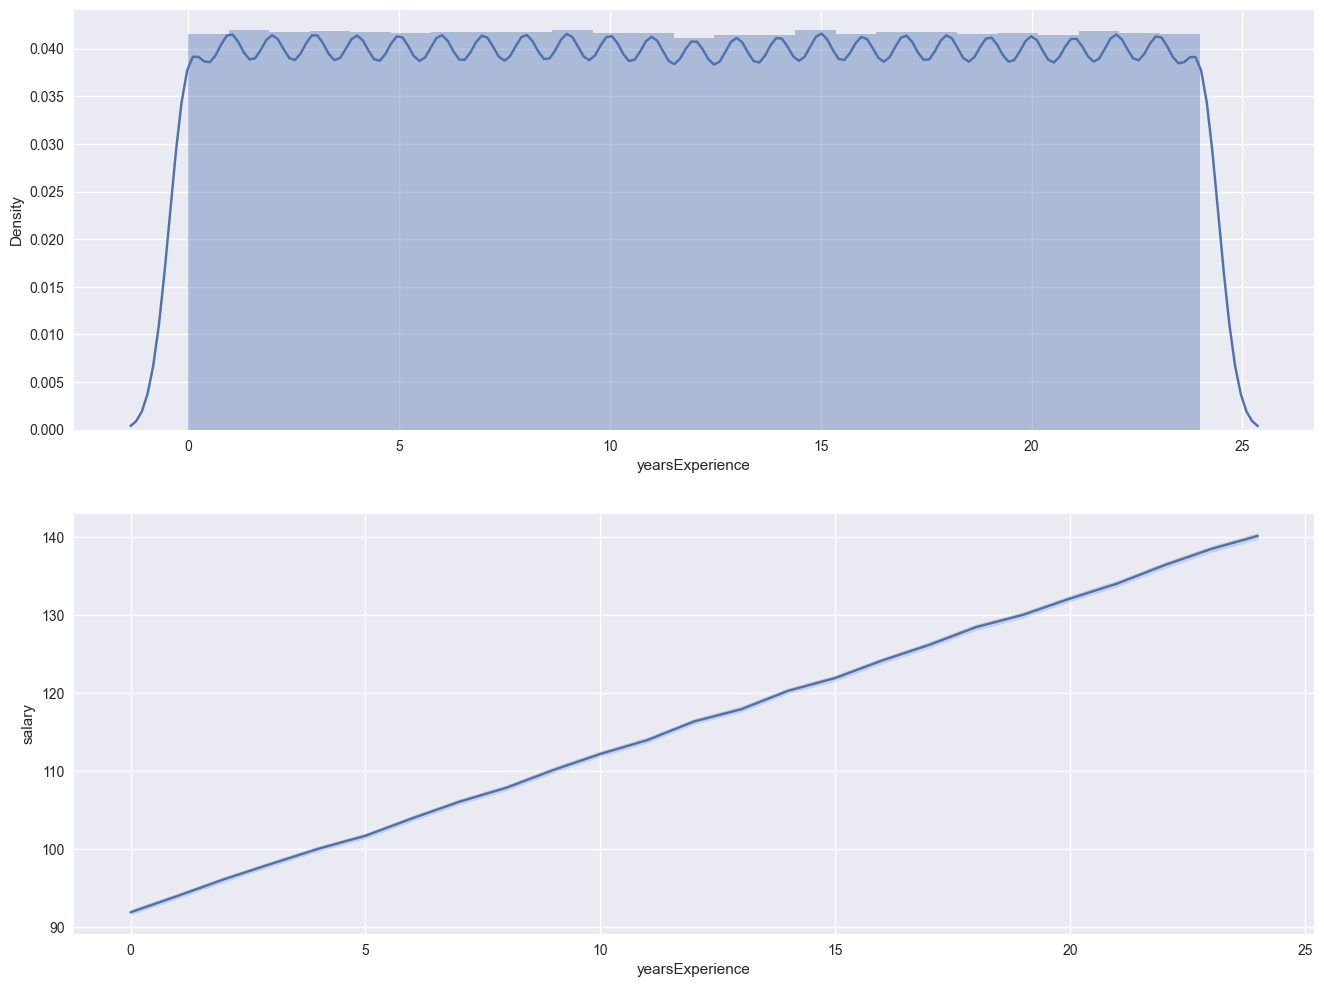

In [15]:
plot_feature(train_feat_sal, 'salary','yearsExperience')

C:\Users\btr\AppData\Local\Temp\ipykernel_13092\1389972553.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], bins = 25)


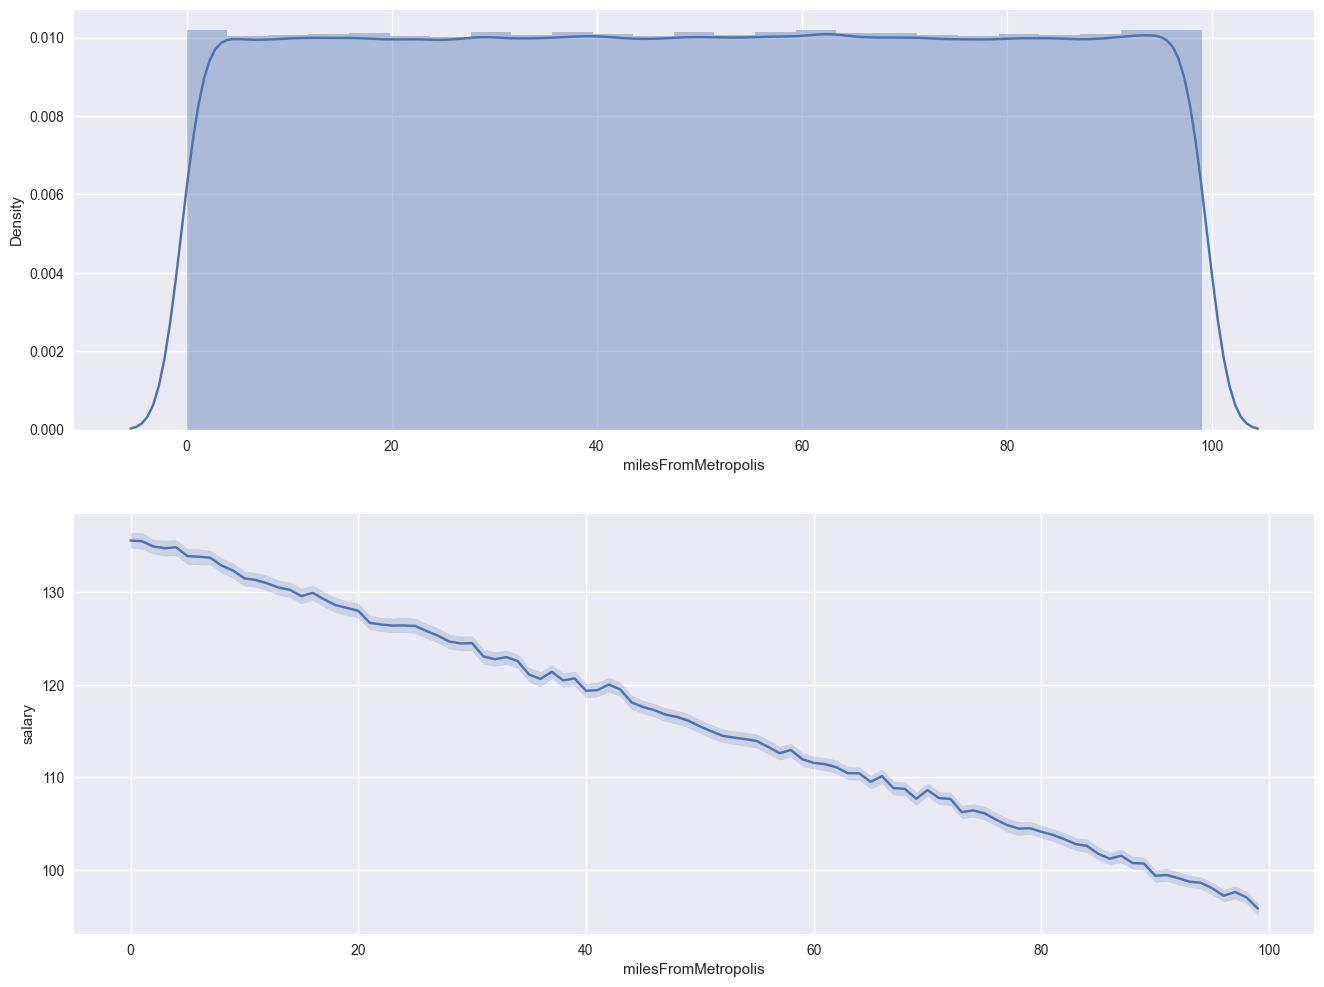

In [16]:
plot_feature(train_feat_sal, 'salary','milesFromMetropolis')

In [17]:
correlations = train_feat_sal.corr()['salary'].sort_values()
print(correlations.head(5), '\n')

milesFromMetropolis   -0.297686
yearsExperience        0.375013
salary                 1.000000
Name: salary, dtype: float64 



C:\Users\btr\AppData\Local\Temp\ipykernel_13092\2140504292.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train_feat_sal.corr()['salary'].sort_values()


# Optimize pandas data type for less memory usage

In [18]:
#https://www.dataquest.io/blog/pandas-big-data/
for col in ["companyId","jobType","degree","major","industry"]:
    train_feat_sal[col] = train_feat_sal[col].astype('category')
#train_feat_sal.info()
train_feat_sal.columns

C:\Users\btr\AppData\Local\Temp\ipykernel_13092\1578210093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_feat_sal[col] = train_feat_sal[col].astype('category')
C:\Users\btr\AppData\Local\Temp\ipykernel_13092\1578210093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_feat_sal[col] = train_feat_sal[col].astype('category')
C:\Users\btr\AppData\Local\Temp\ipykernel_13092\1578210093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [19]:
raw_features = train_feat_sal.copy()

# Feature Transformation

In [20]:
num_feats = train_feat_sal.select_dtypes('int64')
#print(num_feats.columns)
#inclue new features using log and sqrt to include non-linear relationships
for col in num_feats.columns:
    if col == 'salary':
        next
    else:
        num_feats['sqrt_' + col] = np.sqrt(num_feats[col])
        num_feats['log_' + col] = np.log(num_feats[col])
cat_feats = train_feat_sal[['companyId', 'jobType', 'degree', 'major', 'industry']]
#convert into 1 hot encoding
cat_feats = pd.get_dummies(cat_feats, drop_first=True)
features = pd.concat([num_feats, cat_feats], axis = 1)
#print(features.shape)
correlations = features.corr()['salary'].dropna().sort_values()
print(features.select_dtypes('int64').columns)

c:\Users\btr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\btr\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Index(['yearsExperience', 'milesFromMetropolis', 'salary'], dtype='object')


In [21]:
print(correlations.head(10), '\n')
print(correlations.tail(10))
correlations.shape

jobType_JANITOR            -0.441676
major_NONE                 -0.371435
milesFromMetropolis        -0.297686
sqrt_milesFromMetropolis   -0.290965
log_milesFromMetropolis    -0.265230
degree_NONE                -0.257356
degree_HIGH_SCHOOL         -0.203549
jobType_JUNIOR             -0.201987
industry_EDUCATION         -0.175158
industry_SERVICE           -0.122370
Name: salary, dtype: float64 

industry_FINANCE        0.154853
industry_OIL            0.156966
degree_MASTERS          0.171997
jobType_CFO             0.188803
jobType_CTO             0.189608
degree_DOCTORAL         0.231406
log_yearsExperience     0.333966
sqrt_yearsExperience    0.362921
yearsExperience         0.375013
salary                  1.000000
Name: salary, dtype: float64


(94,)

# Feature Selection

In [22]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Salary
    y = x['salary']
    x = x.drop(columns = ['salary'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    
    # Add the score back in to the data
    x['salary'] = y
               
    return x

In [23]:
features = remove_collinear_features(features, 0.6)

sqrt_yearsExperience | yearsExperience | 0.97
log_yearsExperience | yearsExperience | 0.93
sqrt_milesFromMetropolis | milesFromMetropolis | 0.98
log_milesFromMetropolis | milesFromMetropolis | 0.9


In [24]:
#print(features.select_dtypes('int64').columns)
#print(features[features["salary"]==300])
features  = features.dropna(axis=1, how = 'all')
features.shape

#features.info()

(999995, 90)

# ML modelling

In [25]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

#Imputing missing values and scaling values
from sklearn.impute import SimpleImputer as Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor

#ML
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor, Pool
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#Metrics 
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

#Hyperparameter tuning
import optuna

import math
import time

In [26]:
#print(features[features["salary"]==300])
X = features.drop(columns='salary')
Y = pd.DataFrame(features['salary'])
# Split into 80% training and 20% validation set
X_train, X_val, Y_train, Y_val = train_test_split(X, 
                                      Y, 
                                      test_size = 0.20, 
                                      random_state = 1)

print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(799996, 89)
(199999, 89)
(799996, 1)
(199999, 1)


In [27]:
def get_rmse(y_true, y_pred):
    return math.sqrt(abs(np.square(np.subtract(y_true,y_pred)).mean()))
    #rmse = math.sqrt(abs(mse))
    #return rmse



In [28]:
from sklearn.preprocessing import MinMaxScaler
def scaler(X):
    scale = MinMaxScaler()
    X_scaled = X.copy()
    colnames = X_scaled.select_dtypes(include=['float64','int64']).columns.to_list()
    #colnames.remove("salary") #salary is target variable
    print('\nThe following columns are scaled:\n')
    print(colnames)
    scale.fit(X_scaled[colnames])
    X_scaled[colnames] =  scale.transform(X_scaled[colnames])
    return X_scaled


In [29]:
X_train_scaled = scaler(X_train)
X_val_scaled = scaler(X_val)


The following columns are scaled:

['yearsExperience', 'milesFromMetropolis']

The following columns are scaled:

['yearsExperience', 'milesFromMetropolis']


In [30]:
import time
def evaluate_model(model):
    start = time.time()
    #random_forest.fit(X_train, y_train)
    #y_pred = random_forest.predict(X_test) 
    model.fit(X_train_scaled,Y_train)
    Y_pred = model.predict(X_val_scaled)
    print("printing shapes: ")
    print(Y_val.shape)
    print(Y_pred.shape)
    Y_pred = Y_pred.reshape(Y_val.shape)
    rmse = get_rmse(Y_val, Y_pred)
    end = time.time()
    total_time = end-start
    print('Time taken: %0.2f' %(total_time), 's.')
    return rmse,total_time

In [31]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators = 100, n_jobs = 4, max_depth = 20, min_samples_split = 70,
                          max_features = 8, verbose = 0)
gbr = GradientBoostingRegressor(n_estimators = 50, max_depth = 8, loss = 'ls', verbose = 0)
lgbm = LGBMRegressor(random_state = 1)
xgb = XGBRegressor(random_state = 1)
catb = CatBoostRegressor(random_state = 1, 
                                verbose=False,
                                task_type='CPU')

models = [lr,rf,gbr,lgbm,xgb,catb]
model_names = ["Linear Regression","Random Forest","Gradient Boosting","Light GBM","XGBoost","CatBooost"]
model_rmse = {}
model_time = {}



In [32]:
for i,model in enumerate(models):
      rmse,time_1 = evaluate_model(model)
      model_rmse[model_names[i]]=rmse
      model_time[model_names[i]] = time_1
      print (model_names[i]+' Root Mean Squared Error: '+str(rmse), '\n')

printing shapes: 
(199999, 1)
(199999, 1)
Time taken: 8.22 s.
Linear Regression Root Mean Squared Error: 19.617766580233397 



C:\Users\btr\AppData\Local\Temp\ipykernel_13092\360243356.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled,Y_train)


printing shapes: 
(199999, 1)
(199999,)
Time taken: 113.23 s.
Random Forest Root Mean Squared Error: 21.33063744665049 



c:\Users\btr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\btr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


printing shapes: 
(199999, 1)
(199999,)
Time taken: 527.86 s.
Gradient Boosting Root Mean Squared Error: 19.204237552859176 

printing shapes: 
(199999, 1)
(199999,)
Time taken: 8.14 s.
Light GBM Root Mean Squared Error: 18.938885151278853 

printing shapes: 
(199999, 1)
(199999,)
Time taken: 184.80 s.
XGBoost Root Mean Squared Error: 18.96364733145474 



c:\Users\btr\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


printing shapes: 
(199999, 1)
(199999,)
Time taken: 118.64 s.
CatBooost Root Mean Squared Error: 18.854289669220254 



In [38]:
print(model_rmse)
print(model_time)

{'Linear Regression': 19.617766580233397, 'Random Forest': 21.33063744665049, 'Gradient Boosting': 19.204237552859176, 'Light GBM': 18.938885151278853, 'XGBoost': 18.96364733145474, 'CatBooost': 18.854289669220254, 'catboost_cat': 18.844446279399488}
{'Linear Regression': 8.222998142242432, 'Random Forest': 113.23397755622864, 'Gradient Boosting': 527.8633780479431, 'Light GBM': 8.142611742019653, 'XGBoost': 184.80026721954346, 'CatBooost': 118.64098453521729, 'catboost_cat': 737.0554466247559}


In [39]:
# Seperate features and targets - Categorical features not encoded
non_encoded_X = raw_features.drop(columns=['salary', 'jobId'])
non_encoded_Y = pd.DataFrame(raw_features['salary'])


non_encoded_X_train, non_encoded_X_val, non_encoded_Y_train, non_encoded_Y_val = train_test_split(non_encoded_X, 
                                      non_encoded_Y, 
                                      test_size = 0.20, 
                                      random_state = 1)


In [40]:
# CatBoosted with Cat features
catb_cat = CatBoostRegressor(loss_function='RMSE', 
                       random_state=1,
                       verbose=False,
                       task_type='CPU')

pool_train = Pool(non_encoded_X_train, 
                  non_encoded_Y_train, 
                  cat_features = ['industry', 'companyId', 'jobType', 'degree', 'major'])

pool_val = Pool(non_encoded_X_val, 
                cat_features = ['industry', 'companyId', 'jobType', 'degree', 'major'])

# eval_dataset = Pool(non_encoded_X_val, non_encoded_y_val)

start = time.time()
catb_cat.fit(pool_train, 
                  eval_set=(non_encoded_X_val, non_encoded_Y_val), 
                  early_stopping_rounds=791, plot=True)

Y_pred = catb_cat.predict(pool_val)

# Reshape preds so that eval works
#model_pred = model_pred.reshape(330000,1)

# #Evaluate
Y_pred = Y_pred.reshape(non_encoded_Y_val.shape)
rmse = get_rmse(non_encoded_Y_val, Y_pred)

end = time.time()

time_taken = end - start

model_time["catboost_cat"] = time_taken
model_rmse["catboost_cat"] = rmse
print('Best iteration: ', catb_cat.get_best_iteration())
print('Time taken: %0.2f' %time_taken, 's.')
print ('Cat Boosted Regression Root Mean Squared Error: %0.4f' %rmse, '\n')

c:\Users\btr\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Best iteration:  707
Time taken: 916.95 s.
Cat Boosted Regression Root Mean Squared Error: 18.8444 



In [41]:
print(model_rmse)
print(model_time)
print(model_rmse.keys())
print(model_time.keys())

{'Linear Regression': 19.617766580233397, 'Random Forest': 21.33063744665049, 'Gradient Boosting': 19.204237552859176, 'Light GBM': 18.938885151278853, 'XGBoost': 18.96364733145474, 'CatBooost': 18.854289669220254, 'catboost_cat': 18.844446279399488}
{'Linear Regression': 8.222998142242432, 'Random Forest': 113.23397755622864, 'Gradient Boosting': 527.8633780479431, 'Light GBM': 8.142611742019653, 'XGBoost': 184.80026721954346, 'CatBooost': 118.64098453521729, 'catboost_cat': 916.9455137252808}
dict_keys(['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Light GBM', 'XGBoost', 'CatBooost', 'catboost_cat'])
dict_keys(['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Light GBM', 'XGBoost', 'CatBooost', 'catboost_cat'])


C:\Users\btr\AppData\Local\Temp\ipykernel_13092\2162795043.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Model Comparison on Test RMSE')

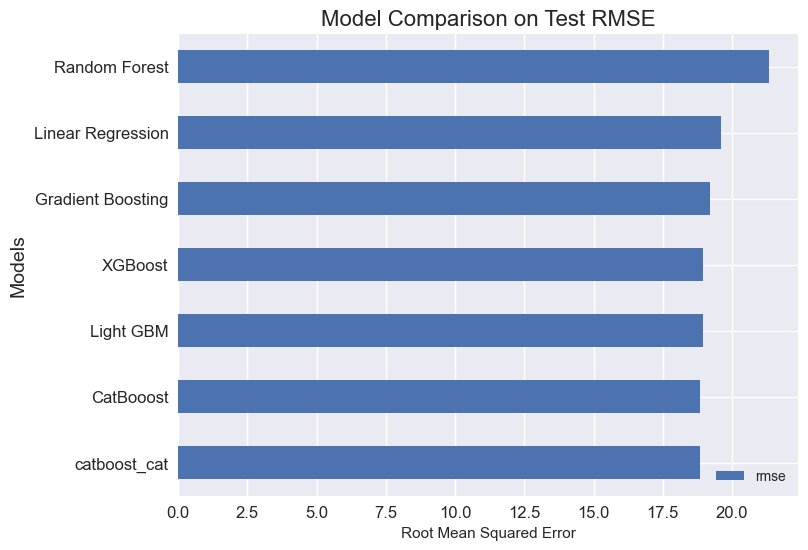

In [42]:
from optparse import Values


plt.style.use('seaborn')
figsize(8, 6)

model_comparison = pd.DataFrame({'model':model_rmse.keys(),'rmse':model_rmse.values()})
model_comparison.sort_values('rmse', ascending = True).plot(x = 'model', 
                                                           y = 'rmse', 
                                                           kind = 'barh')
plt.ylabel('Models', size = 14) 
plt.yticks(size = 12)
plt.xlabel('Root Mean Squared Error')
plt.xticks(size = 12)
plt.title('Model Comparison on Test RMSE', size = 16)

C:\Users\btr\AppData\Local\Temp\ipykernel_13092\963258736.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Model Comparison on time')

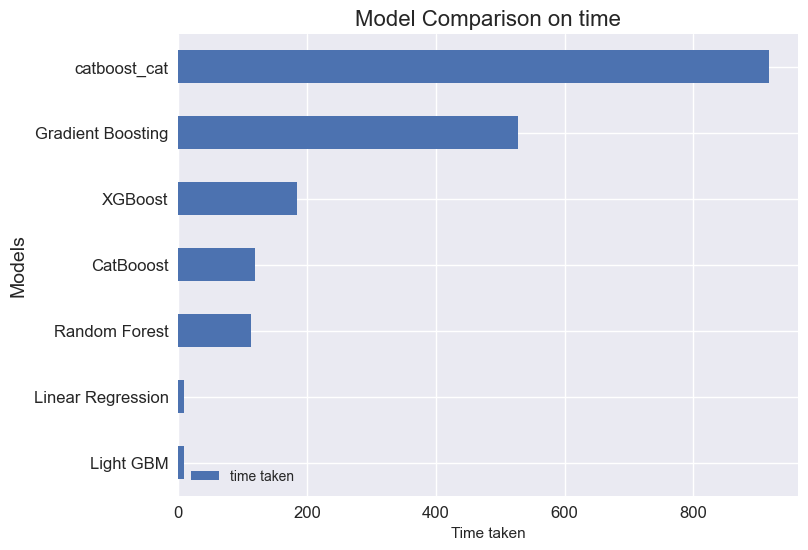

In [43]:
from optparse import Values


plt.style.use('seaborn')
figsize(8, 6)

model_comparison = pd.DataFrame({'model':model_time.keys(),'time taken':model_time.values()})
model_comparison.sort_values('time taken', ascending = True).plot(x = 'model', 
                                                           y = 'time taken', 
                                                           kind = 'barh')
plt.ylabel('Models', size = 14) 
plt.yticks(size = 12)
plt.xlabel('Time taken')
plt.xticks(size = 12)
plt.title('Model Comparison on time', size = 16)

<AxesSubplot: xlabel='feature'>

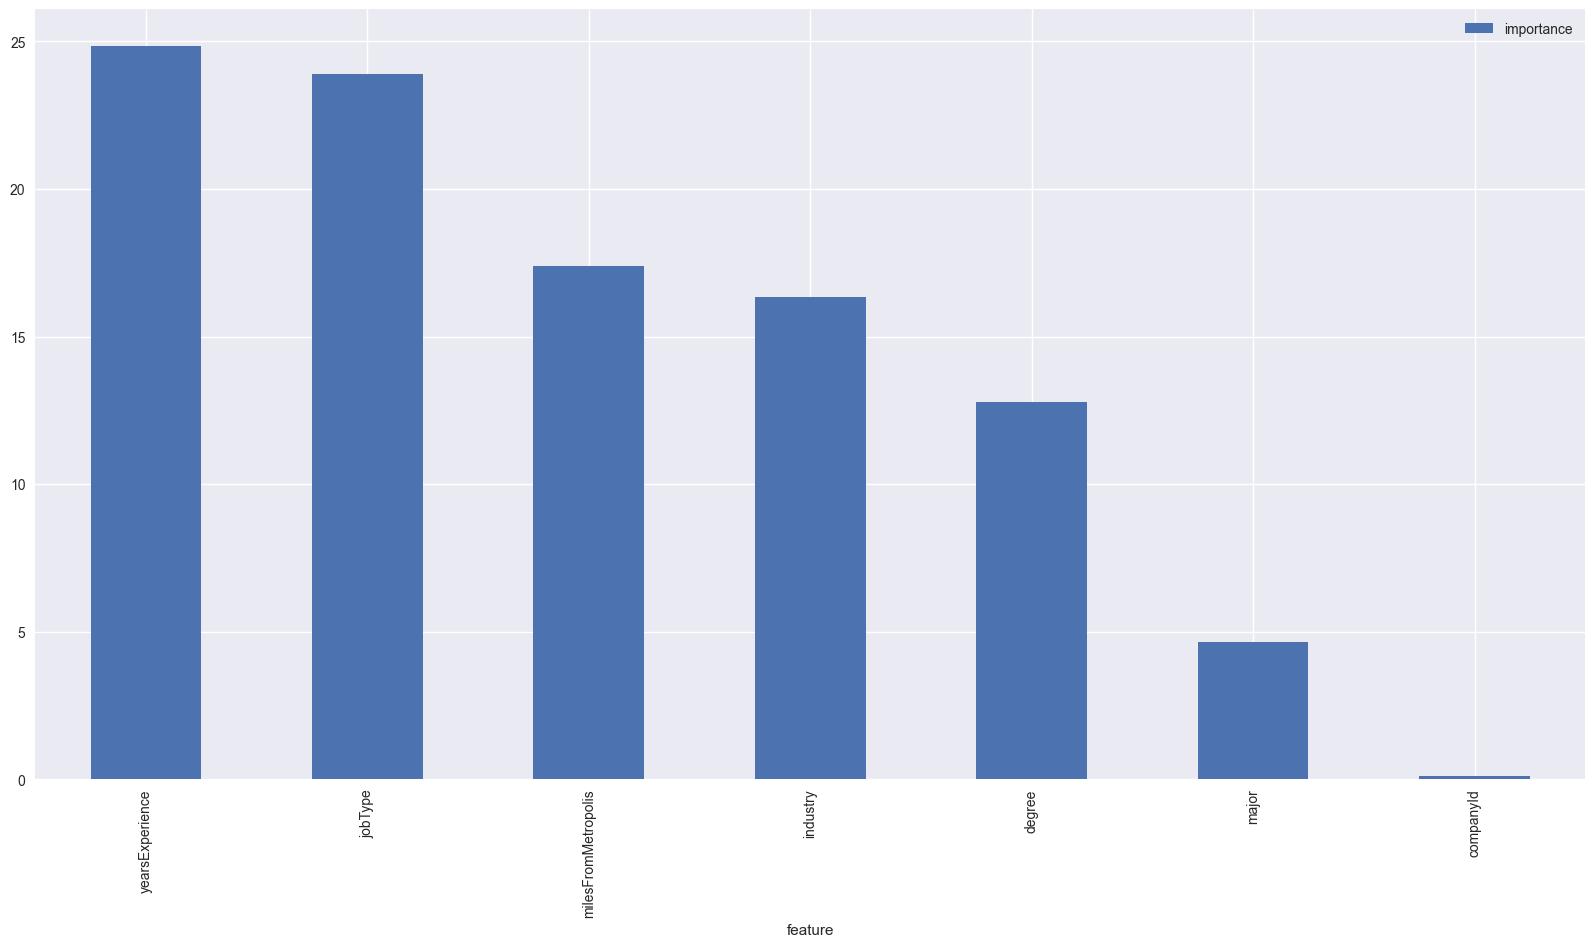

In [45]:
def get_model_feature_importances(model, feature_df):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = [0] * len(feature_df.columns)
    
    feature_importances = pd.DataFrame({'feature': feature_df.columns, 'importance': importances})
    feature_importances.sort_values(by = 'importance', ascending = False, inplace = True)
    ''' set the index to 'feature' '''
    feature_importances.set_index('feature', inplace = True, drop = True)
    return feature_importances
feature_importances = get_model_feature_importances(catb_cat, non_encoded_X_train)
feature_importances.plot.bar(figsize=(20,10))

In [ ]:
def finetuned_catboosted(X, Y, X_test, Y_test, model):
    ''' 
        Driver function for categorical model fit, predict and eval 
    '''
    # CatBoosted with Cat features
    pool_train = Pool(X, Y, 
                    cat_features = ['companyId', 'jobType', 'degree', 'major', 'industry'])

    pool_val = Pool(non_encoded_X_val, 
                    cat_features = ['companyId', 'jobType', 'degree', 'major', 'industry'])

    start = time.time()
    model.fit(pool_train, 
                    eval_set=(X_test, Y_test), 
                    early_stopping_rounds=791) # plot=True

    Y_pred = model.predict(pool_val)

    Y_pred = Y_pred.reshape(non_encoded_Y_val.shape)

    # #Evaluate
    rmse = get_rmse(Y_test, Y_pred)

    end = time.time()

    time_taken = end - start

    print('Time taken: %0.2f' %time_taken, 's.')
    print ('Cat Boosted Regression Root Mean Squared Error: %0.4f' %rmse, '\n')
    
    return rmse

In [ ]:
def finetune_catboost(trial):
    '''
        Fine tune function to tune a `CatBoostRegressor` model.
    '''

    params = {
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'subsample': trial.suggest_uniform('subsample',0,1),
        # Amount of randomness to use for scoring splits when the tree structure is selected
        # Helps avoid overfitting.
        'random_strength': trial.suggest_uniform('random_strength',10,50),
        'depth': trial.suggest_int('depth',1, 15),
        # Min number of training samples in leaf
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
    }

    #if GPU_ENABLED:
    #    params["task_type"] = "GPU"
    #    params["bootstrap_type"] = "Poisson"

    finetuned_c_cat_boosted = CatBoostRegressor(loss_function='RMSE', 
                       random_state=1,
                       verbose=False, 
                       **params,)
    
    return finetuned_catboosted(non_encoded_X_train, 
                                non_encoded_Y_train, 
                                non_encoded_X_val, 
                                non_encoded_Y_val, 
                                finetuned_c_cat_boosted)


In [ ]:
study_cat = optuna.create_study(direction="minimize")
study_cat.optimize(finetune_catboost, n_trials=100)
study_cat.best_params

# Predict salary for the test data

In [54]:
test_df = pd.read_csv('test_features.csv')
for col in ["companyId","jobType","degree","major","industry"]:
    test_df[col] = test_df[col].astype('category')

In [60]:
#print(test_df.shape)
#print(test_df.head(10))
job_ids_df = test_df.iloc[:, 0:1] 
non_encoded_X_test = test_df.drop(columns=['jobId'])
pool_test = Pool(non_encoded_X_test, 
                cat_features = ['industry', 'companyId', 'jobType', 'degree', 'major'])

# eval_dataset = Pool(non_encoded_X_val, non_encoded_y_val)

start = time.time()

Y_pred = catb_cat.predict(pool_test)

Y_pred = Y_pred.reshape((1000000,1))
end = time.time()

time_taken = end - start
print(time_taken)
print(Y_pred.shape)


c:\Users\btr\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1419: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


6.55295205116272
(1000000, 1)


In [65]:
salary_df = pd.DataFrame(Y_pred, 
             columns=['salary'])
#print(job_ids_df.shape)
#print(job_ids_df.head)
#print(salary_df.shape)
#rint(salary_df.head)
jobid_salary_idf = pd.concat([job_ids_df, salary_df], axis=1)
jobid_salary_idf_debug = pd.concat([test_df, salary_df], axis=1)
jobid_salary_idf.to_csv("test_salaries.csv")
jobid_salary_idf_debug.to_csv("test_salaries_debug.csv")
print(jobid_salary_idf.shape)
print(jobid_salary_idf.head(10))

(1000000, 2)
              jobId      salary
0  JOB1362685407687  111.144576
1  JOB1362685407688   92.605868
2  JOB1362685407689  183.672065
3  JOB1362685407690  103.637962
4  JOB1362685407691  116.752083
5  JOB1362685407692  154.493680
6  JOB1362685407693   96.727248
7  JOB1362685407694  118.322556
8  JOB1362685407695  106.452002
9  JOB1362685407696   97.500883


In [ ]:
train_feat_sal.to_csv("train_feat_salary_debug.csv")